# Лекция 9. Крыловское подпространство и главные итерационные методы

## План на сегодня

- Процесс Арнольди и Ланцоша для ортогонализации в Крыловском подпространстве, результаты об оптимальности Крыловских подпространств
- Главные итерационные методы: метод сопряжённых градиентов и GMRES
- Оценки сходимости

## Решение линейных систем и минимизация функционалов

- Вместо решения линейной системы, мы можем минимизировать норму вектора остатков:

$$R(x) = \Vert A x - f \Vert^2_2.$$

- Условие оптимальности первого порядка $\nabla R(x) = 0$ даёт

$$A^* A x = A^* f,$$

таким образом число обусловленности возвелось в квадрат, поэтому явная минимизация нормы остатков с помощью стандартных методов оптимизации используется редко.

- Для случая симметричной положительно определённой матрицы есть более простой функционал.

## Функционал энергии

Пусть $A = A^* > 0$, тогда следующий функционал

$$\Phi(x) = (Ax, x)  - 2(f, x)$$

называется **функционалом энергии**.

### Свойства функционала энергии

- Строго выпуклый (проверьте!)

$$ \Phi(\alpha x + (1 - \alpha)y) < \alpha \Phi(x) + (1 - \alpha) \Phi(y)$$

- Так как он строго выпуклый, то у него есть единственный локальный минимум, который также является глобальным

- Глобальный минимум $x_*$ удовлетворяет равенству

$$A x_* = f.$$

- В самом деле, 

$$\nabla \Phi = 2(Ax - f).$$ 

и условие оптимальности первого порядка $\nabla \Phi (x_*) = 0$ даёт

$$A x_* = f.$$

## Аппроксимация решения на подпространстве

- Пусть дано линейное $M$-мерное подпространство с базисными векторами $\{y_1, \dots, y_M\}$, мы хотим найти приближённое решение в этом базисе, то есть 

$$A x \approx f, \quad x = x_0 +  \sum_{k=1}^M c_k y_k,$$

где $c$ – вектор коэффициентов.

- В случае симметричной положительно определённой матрицы нам нужно минимизировать

$$(Ax, x) - 2(f, x)$$ 

при условии 

$$x = x_0 + Y c,$$

где $Y=[y_1,\dots,y_M]$ матрица размера $n \times M$ и вектор $c$ имеет размерность $M$.

- Используя представление для $x$, получаем следующую задачу минимизации на вектор $c$:

$$\widehat{\Phi}(c) = (A Y c, Y c) + 2 (Y^*Ax_0, c) - 2(f, Y c) = (Y^* A Y c, c) - 2(Y^* (f - Ax_0), c).$$

- Отметим, что это тот же самый функционал энергии, но для **Галёркинской проекции** матрицы $A$:

$$Y^* A Y c = Y^* (f - Ax_0) = Y^* r_0,$$

что является линейной системой размера $M \times M$ с симметричной положительно определённой матрицей, если $Y$ имеет полный ранг.

- Но как выбрать $Y$?

## Выбор подпространства

- В Крыловском подпространстве мы генерируем всё подпространство из единственного вектора $r_0 = f - Ax_0$:

$$y_0\equiv k_0 = r_0, \quad y_1\equiv k_1 = A r_0, \quad y_2\equiv k_2 = A^2 r_0, \ldots, \quad y_{M-1}\equiv k_{M-1} = A^{M-1} r_0.$$

- Это даёт **Крыловское подпространство** порядка $M$

$$\mathcal{K}_M(A, r_0) = \mathrm{Span}(r_0, Ar_0, \ldots, A^{M-1} r_0).$$

- Оригинальная работа, в которой вводятся такие подпространства "О численном решении уравнения, которым в технических вопросах определяются частоты малых колебаний материальных систем",  А. Н. Крылов, 1931, доступна [тут](http://www.mathnet.ru/links/a2431bc65c0764da9a1ae95c73f741f6/im5215.pdf)

## Решение $x_*$ лежит в Крыловском подпространстве $x_* \in \mathcal{K}_n(A, f)$

- По теореме [Гамильтона-Кэли](https://ru.wikipedia.org/wiki/%D0%A2%D0%B5%D0%BE%D1%80%D0%B5%D0%BC%D0%B0_%D0%93%D0%B0%D0%BC%D0%B8%D0%BB%D1%8C%D1%82%D0%BE%D0%BD%D0%B0_%E2%80%94_%D0%9A%D1%8D%D0%BB%D0%B8): $p(A) = 0$, где $p(\lambda) = \det(A - \lambda I)$
- $p(A)f = A^nf + a_1A^{n-1}f + \ldots + a_{n-1}Af + a_n f = 0$
- $A^{-1}p(A)f = A^{n-1}f + a_1A^{n-2}f + \ldots + a_{n-1}f + a_nA^{-1}f = 0$
- $x_* = A^{-1}f = -\frac{1}{a_n}(A^{n-1}f + a_1A^{n-2}f + \ldots + a_{n-1}f)$
- Таким образом, $x_* \in \mathcal{K}_n(A, f)$

## Плохая обусловленность естественного базиса

Естественный базис в Крыловском подпространстве очень **плохо обусловлен**, поскольку 

$$k_i = A^i r_0 \rightarrow \lambda_\max^i v,$$

где $v$ собственный вектор, соответствующий максимальному собственному значению $A$, то есть $k_i$ становятся всё более и более коллинеарными для больших $i$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as spsp
%matplotlib inline

n = 100
ex = np.ones(n);
# A = spsp.spdiags(np.vstack((-ex,  2*ex, -ex)), [-1, 0, 1], n, n, 'csr') 
A = np.random.randn(n, n)
f = np.ones(n)
x0 = np.random.randn(n)

subspace_order = 10
krylov_vectors = np.zeros((n, subspace_order))
krylov_vectors[:, 0] = f - A.dot(x0)
for i in range(1, subspace_order):
    krylov_vectors[:, i] = A.dot(krylov_vectors[:, i-1])
    
s = np.linalg.svd(krylov_vectors, compute_uv=False)
print("Condition number = {}".format(s.max() / s.min()))

Condition number = 850538169.9119898


### Решение: получить ортогональный базис в Крыловском подпространстве

## Хороший базис в Крыловском подпространстве

- Для повышения устойчивости мы сначала ортогонализуем векторы из Крыловского подпространства, используя процесс Грама-Шмидта (или QR разложение)

$$K_j = \begin{bmatrix} r_0 & Ar_0 & A^2 r_0 & \ldots & A^{j-1} r_0\end{bmatrix} = Q_j R_j. $$

- После чего решение приближается как $$x \approx x_0 + Q_j c.$$ 


## Короткий путь к соотношению Арнольди

**Утверждение.** Матрица Крыловских векторов $K_j$ удовлетворяет важному рекуррентному соотношению (которое называется **соотношение Арнольди**)

$$A Q_j = Q_j H_j + h_{j, j-1} q_j e^{\top}_{j-1},$$

где $H_j$ – верхне-гессенбергова матрица, а  $Q_{j+1} = [q_0,\dots,q_j]$ имеет ортонормированные столбцы, которые образуют пространство $K_{j+1}$.

- Давайте докажем его (для простоты рассмотрим $j = 3$):

$$A \begin{bmatrix} k_0 & k_1 & k_2 \end{bmatrix} = \begin{bmatrix} k_1 & k_2 & k_3 \end{bmatrix} = \begin{bmatrix} k_0 & k_1 & k_2 \end{bmatrix} \begin{bmatrix} 0 & 0 & \alpha_0 \\ 1 & 0  & \alpha_1 \\ 0 & 1  & \alpha_2 \\ \end{bmatrix} + \begin{bmatrix} 0 & 0 & k_3  - \alpha_0 k_0 - \alpha_1 k_1 - \alpha_2 k_2 \end{bmatrix}, $$
 
где $\alpha_s$ будут выбраны позднее. 

- Обозначим $\widehat{k}_3 = k_3  - \alpha_0 k_0 - \alpha_1 k_1 - \alpha_2 k_2$.
 
- В матричной форме,
 
 $$A K_3 = K_3 Z + \widehat k_3 e^{\top}_2,$$
 
 где $e_2$ – последний столбец единичной матрицы.
 
- Пусть QR разложение матрицы $K_3$ имеет вид

$$K_3 = Q_3 R_3.$$

Тогда
 
 $$A Q_3 R_3 = Q_3 R_3 Z + \widehat{k}_3 e^{\top}_2,$$
 
 $$ A Q_3 = Q_3 R_3 Z R_3^{-1} + \widehat{k}_3 e^{\top}_2 R_3^{-1}.$$


- Заметим, что

$$e^{\top}_2 R_3^{-1} = \begin{bmatrix} 0 & 0 & 1 \end{bmatrix} \begin{bmatrix} * & * & * \\ 0 & * & * \\ 0 & 0 & * \end{bmatrix}  = \gamma e^{\top}_2,$$
 
 и
 
 $$R_3 Z R_3^{-1} = \begin{bmatrix} * & * & * \\* & * & * \\  0 & * & * \\ \end{bmatrix},$$      

в общем случае она будет искомой матрицей $H$ и будет иметь верхне-гессенбергову форму, то есть матрица имеет вид

$$H_{ij} = 0, \quad \mbox{если } i > j + 1.$$

## (Почти) соотношение Арнольди

- Пусть $Q_j$ ортогональный базис в Крыловском подпространстве, тогда мы получили почти соотношение Арнольди

$$A Q_j = Q_j H_j +  \gamma\widehat{k}_j e^{\top}_{j-1},$$

где $H_j$ верхне-гессенбергова форма и 

$$\widehat{k}_j = k_j - \sum_{s=0}^{j-1} \alpha_s k_s.$$

- Мы выберем $\alpha_s$ таким образом, чтобы

$$Q^*_j \widehat{k}_j = 0.$$

- Тогда $\widehat{k}_j = h_{j, j-1} q_j,$ где $q_j$ последний столбец в матрице $Q_{j+1}$.

## Соотношение Арнольди: итоговое выражение

Получили рекуррентное соотношение

$$A Q_j = Q_j H_j + h_{j, j-1} q_j e^{\top}_{j-1}.$$

- Это ключевая формула для эффективной генерации векторов из Крыловских подпространств.

- Для несимметричного случая это выражение совпадает с модифицированным методом Грама-Шмидта.

- Для симметричного случая у нас будет более простая форма (процесс Ланцоша).

## Процесс Ланцоша

- Если $A = A^*$, тогда

$$Q^*_j A Q_j = H_j, $$

таким образом $H_j$ эрмитова, и следовательно трёхдиагональна, $H_j = T_j$.

- Это даёт нам короткое рекуррентное выражение для генерации векторов Арнольди $q_j$ без **полной** ортогонализации.

## Процесс Ланцоша (2)

$$ A Q_j = Q_j T_j + t_{j, j-1} q_j e^{\top}_{j-1}.$$


- Для получения вектора $q_j$ нам нужно вычислить только последний столбец

$$t_{j, j-1} q_j = (A Q_j - Q_j T_j) e_{j-1} = A q_{j-1} - t_{j-1, j-1} q_{j-1} - t_{j-2, j-1} q_{j-2}. $$

- Коэффициенты $\alpha_j = t_{j-1, j-1}$ и $\beta_j = t_{j-2, j-1}$ могут быть восстановлены из условий ортогональности

$$(q_j, q_{j-1}) = 0, \quad (q_j, q_{j-2}) = 0$$

- **Все остальные ограничения на ортогональность будут выполнены автоматически!!**

- И нам нужно хранить только два вектора, чтобы получить новый вектор.

## От явного процесса Ланцоша к методу сопряжённых градиентов

- Теперь мы можем получить из рекуррентных формул метода Ланцоша знаменитый **метод сопряжённых градиентов**.

- Для матрицы $A = A^* > 0$

$$A Q_j = Q_j T_j + T_{j, j-1} q_j.$$

- Вспомним, что при минимизации функционала энергии в базисе $Y$ мы получили линейную систему 

$$Y^* A Y c = Y^* f.$$

- Здесь $Y = Q_j$, поэтому приближённое решение $Ax \approx f$ при условии $x_j = x_0 + Q_j c_j$ может быть получено из решения линейной системы меньшей размерности

$$Q^*_j A Q_j c_j = T_j c_j = Q^*_j r_0 .$$

- Так как $r_0$ образует Крыловское подпрострасво первого порядка, то

$$Q^*_j r_0  = \Vert r_0 \Vert_2^2 e_0 = \gamma e_0.$$

- У нас есть трёхдиагональная система уравнений на $c$:

$$T_j c_j = \gamma e_0$$

и $x_j = Q_j c_j$.

- Мы можем остановится на этом месте, но вместо решения трёхдиагональной системы мы можем получить короткие рекуррентные формулы  для каждой итерации.

- Так как $A$ положительно определена, $T_j$ также положительно определена и имеет LU разложение

- $T_j = L_j U_j$, где $L_j$ бидиагональная матрица с единицами на диагонали, $U_j$ верхне-бидиагональная матрица.

- Нам нужно определить одну поддиагональ в $L$ (с элементами $c_1, \ldots, c_{j-1}$), главную диагональ $U_j$ (с элементами $d_0, \ldots, d_{j-1}$ и наддиагональ в $U_j$ (с элементами $b_1, \ldots, b_{j-1}$).

- Для них выполнены удобные рекуррентные соотношения:

$$c_i = b_i/d_{i-1}, \quad d_i = \begin{cases} a_1, & \mbox{если } i = 0, \\
a_i - c_i b_i, & \mbox{если } i > 0. \end{cases}$$

- Для решения выполнено

$$x_j = Q_j T^{-1}_j \gamma e_0  = \gamma Q_j (L_j U_j)^{-1} e_0  = \gamma Q_j U^{-1}_j L^{-1}_j e_0.$$

- Введём две новых величины:  

$$P_j = Q_j U^{-1}_j, \quad z_j = \gamma L^{-1}_j e_0.$$

- Теперь у нас есть следующее выражение для $x_j$:

$$ x_j = P_j z_j$$

- Из-за рекуррентных соотношений у нас есть

$$P_j = \begin{bmatrix} P_{j-1} & p_j \end{bmatrix}, $$

и 

$$z_j = \begin{bmatrix} z_{j-1} \\ \xi_{j} \end{bmatrix}.$$

- Для $p_j$ и $\xi_j$ у нас есть короткие рекуррентные соотношения (из-за бидиагональной структуры)

$$p_j = \frac{1}{d_j}\left(q_j - b_j p_{j-1} \right), \quad \xi_j = -c_j \xi_{j-1}.$$

- Таким образом, мы пришли к коротким рекуррентным соотношениям для $x_j$:

$$x_j = P_j z_j = P_{j-1} z_{j-1} + \xi_j p_j = x_{j-1} + \xi_j p_j.$$

и $q_j$ ищутся из соотношения Ланцоша (см слайды ранее).

- Этот метод для решения линейных систем называется **прямой метод Ланцоша**. Он тесно связан с методом сопряжённых градиентов.

## Прямой метод Ланцоша

- У нас есть прямой метод Ланцоша, в котором мы храним

$$p_{j-1}, q_j, x_{j-1}$$ 

для получения новой оценки $x_j$.

- Основная проблема с $q_j$: у нас есть трёхчленное рекуррентное соотношение, но в неточной арифметике ортогональность может теряться, что ведёт к ошибкам при вычислении.

- Далее короткая демонстрация такого поведения

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as sp
import scipy.sparse as spsp
from scipy.sparse import csc_matrix

n = 128
ex = np.ones(n);
A = spsp.spdiags(np.vstack((ex,  -2*ex, ex)), [-1, 0, 1], n, n, 'csr'); 
rhs = np.ones(n)

nit = 65
q1 = rhs/np.linalg.norm(rhs)
q2 = A.dot(q1)
q2 = q2 - np.dot(q2, q1)*q1
q2 = q2/np.linalg.norm(q2)
qall = [q1, q2]
for i in range(nit):
    qnew = A.dot(qall[-1])
    qnew = qnew - np.dot(qnew, qall[-1])*qall[-1]
    qnew = qnew/np.linalg.norm(qnew)
    qnew = qnew - np.dot(qnew, qall[-2])*qall[-2]
    qnew = qnew/np.linalg.norm(qnew)
    qall.append(qnew)
qall_mat = np.vstack(qall).T
print(np.linalg.norm(qall_mat.T.dot(qall_mat) - np.eye(qall_mat.shape[1])))

1.7739805413136174


## Метод сопряжённых градиентов (CG)

- Вместо использования вектора $q_j$ (последнего вектора из модифицирвоанного метода Грама-Шмидта), удобнее работать с вектором остатков

$$r_j = f - A x_j.$$

- Итоговые рекуррентные формулы имеют вид

$$x_j = x_{j-1} + \alpha_{j-1} p_{j-1}$$

$$r_j = r_{j-1} - \alpha_{j-1}  A p_{j-1}$$

$$p_j = r_j + \beta_j p_{j-1}.$$

- Отсюда следует название сопряжённых градиентов: к градиентам $r_j$ мы прибавляем **сопряжённые направления** $p_j$.

- Выполнена ортогональность остатков (проверьте!):

$$(r_i, r_j) = 0, \quad i \ne j$$

и **A-ортогональность** сопряжённых направлений:

$$ (A p_i, p_j) = 0,$$

которая может быть проверена по определению (проверьте!).

- Уравнения на $\alpha_j$ и $\beta_j$ могут быть теперь определены из этих двух свойств.

## Итоговые формулы для метода сопряжённых градиентов

- Мы знаем, что  $(r_{j}, r_{j-1}) = 0 = (r_{j-1} - \alpha_{j-1} A r_{j-1}, r_{j-1})$, 

тогда

$$\alpha_{j-1} = \frac{(r_{j-1}, r_{j-1})}{(A r_{j-1}, r_{j-1})}.$$

- Таким же способом, получим

$$\beta_{j-1} = \frac{(r_j, r_j)}{(r_{j-1}, r_{j-1})}.$$

- Вспомним, что

$x_j = x_{j-1} + \alpha_{j-1} p_{j-1}$

$r_j = r_{j-1} - \alpha_{j-1}  A p_{j-1}$

$p_j = r_j + \beta_j p_{j-1}$.

- Требуется только одно умножение матрицы на вектор.


## Как мы получили метод сопряжённых градиентов: обзор

- Хотим найти вектор $x_*$ в Крыловском подпространстве
- Но естественный базис плохо обусловлен, поэтому нам нужна ортогонализация
- Вывести рекуррентные соотношения для последовательной ортогонализации векторов из базиса в Крыловско подпространстве
    - процесс Арнольди для несимметричных матриц
    - процесс Ланцоша для симметричных матриц
- Правильное переписывание этих формул даёт короткие рекуррентные соотношения

## Немного истории

- Более подробно история изложена [тут](https://www.siam.org/meetings/la09/talks/oleary.pdf)

- Когда Хестенс работал над методом в 1936, Гарвадский профессор сказал ему, что это слишком простой метод для публикации
- Метод сопряжённых градиентов не работает на логарифмической линейке
<img src="slide_rule.jpg">
- CG имеет мало достоинств по сравнению с методом Гаусса при вычислении на калькуляторе.
- CG плохо приспособлен для "human computers" – слишком много обменов данными.
<img src="human_computers.jpg">

## Свойства метода сопряжённых градиентов

- Нужно хранить 3 вектора.

- Поскольку он генерирует $A$-ортогональную последовательность $p_1, \ldots, p_N$, после $n$ шагов он должен остановиться

- На практике это свойство не выполняется в неточной арифметике, поэтому после того, как в 1952 году Хестенс и Штифель изобрели этот метод, он был назван **неустойчивым**.

- На самом деле это замечательный итерационный метод!

## $A$-оптимальность


- Функционал энергии может быть записан в виде

$$(Ax, x) - 2(f, x) = (A (x - x_*), (x - x_*)) - (Ax _*, x_*),$$

где $A x_* = f$. 

- С точностью до постоянного множителя

$$ (A(x - x_*), (x -x_*)) = \Vert x - x_* \Vert^2_A,$$

что является **A-нормой** вектора ошибки.


## Сходимость

- CG вычисляет $x_k$, который минимизирует функционал энергии на Крыловском подпространстве, то есть $x_k = p(A)f$, где $p$ – полином степени $k+1$, поэтому

$$\Vert x_k - x_* \Vert_A  =  \inf\limits_{p} \Vert \left(p(A) - A^{-1}\right) f \Vert_A. $$

- Используя спектральное разложение матрицы $A$ получим

$$A = U \Lambda U^*, \quad  g = U^* f,$$ 

и

$$\Vert x - x_* \Vert^2_A = \displaystyle{\inf_p} \Vert \left(p(\Lambda) - \Lambda^{-1}\right) g \Vert_\Lambda^2 = \displaystyle{\inf_p}
\displaystyle{\sum_{i=1}^n} \frac{(\lambda_i p(\lambda_i) - 1)^2 g^2_i}{\lambda_i} = \displaystyle{\inf_{q, q(0) = 1}} \displaystyle{\sum_{i=1}^n} \frac{q(\lambda_i)^2 g^2_i}{\lambda_i}
$$

- Выбор оптимального $q$ зависит от распределения собственных значений.



## Абсолютная и относительная ошибка

- Имеет место следующее выражение

$$\Vert x - x_* \Vert^2_A \leq \sum_{i=1}^n \frac{g^2_i}{\lambda_i} \inf_{q, q(0)=1} \max_{j} q({\lambda_j})^2$$

- Первый множитель

$$\sum_{i=1}^n \frac{g^2_i}{\lambda_i} = (A^{-1} f, f) = \Vert x_* \Vert^2_A.$$

- И мы получили оценку на относительную ошибку

$$\frac{\Vert x - x_* \Vert_A }{\Vert x_* \Vert_A} \leq \inf_{q, q(0)=1} \max_{j} |q({\lambda_j})|.$$

- Таким образом, если матрица имеет только 2 различных собственных значения, тогда существует полином степени 2 такой что $q({\lambda_1}) = q({\lambda_2}) = 0$, и в этом случае CG сходится за 2 итерации.

<font color='red'>

- Если собственные значения кластеризованы и имеется $l$ выбросов, тогда после первых $\mathcal{O}(l)$ итераций CG сойдётся как будто этих выбросов не было (следовательно, эффективное число обусловленности меньше).
    
- Интуитивное объяснение этого факта в том, что после $\mathcal{O}(l)$ итераций полином имеет степень больше чем $l$ и таким образом зануляет $l$ выбросов.
</font>


- Давайте найдём другую полезную оценку сходимости.
- Так как

$$
\inf_{q, q(0)=1} \max_{j} |q({\lambda_j})| \leq \inf_{q, q(0)=1} \max_{\lambda\in[\lambda_\min,\lambda_\max]} |q({\lambda})|,
$$

то используя результат, используемый в методе Чебышёва, получим такую же скорость сходимости:

$$\frac{\Vert x_k - x_* \Vert_A }{\Vert x_* \Vert_A} \leq \gamma \left( \frac{\sqrt{\mathrm{cond}(A)}-1}{\sqrt{\mathrm{cond}(A)}+1}\right)^k.$$

## Остановка за конечное число шагов & кластеризация спектра

1. Если $A$ имеет $m$ различных собственных значений, CG сойдётся за $m$ итераций (покажите!).
2. Если $A$ имеет $m$ "кластеров" собственных значений, CG будет сходится по очереди учитывая каждый кластер.

#### В результате: сходимость лучше, чем у метода Чебышёва, но чуть более высокая стоимость одной итерации

## Резюме про CG

CG – это метод, которым нужно решать линейные системы с 

симметричными положительно определёнными матрицами:

1. Требует $\mathcal{O}(n)$ памяти
2. Корень из числа обусловленности в оценке сходимости
3. Автоматическое использование выбросов и кластеров собственных значений
4. Свойство $A$-оптимальности

## Нелинейный метод сопряжённых градиентов

- CG минимизирует функционал энергии, который является квадратичным по $x$
- Формулы CG были отправной точкой для разработки методов минимизации произвольной выпуклой функции
- Наиболее популярные расширения метода сопряжённых градиентов (также известный как нелинейный метод сопряжённых градиентов): 
    - [метод Hestenes'a-Stiefel'a](https://www.fing.edu.uy/inco/cursos/numerico/aln/hes_stief1952.pdf)
    - [метод Polak'a-Ribiere'a](http://www.numdam.org/article/M2AN_1969__3_1_35_0.pdf) - оригинальная работа на французском :)
    - [метод Fletcher'a–Reeves'a](https://watermark.silverchair.com/070149.pdf?token=AQECAHi208BE49Ooan9kkhW_Ercy7Dm3ZL_9Cf3qfKAc485ysgAAAkMwggI_BgkqhkiG9w0BBwagggIwMIICLAIBADCCAiUGCSqGSIb3DQEHATAeBglghkgBZQMEAS4wEQQMiWM0crDA8bZ0Fj5HAgEQgIIB9tIM8xbxhkhniJQifurRLHIaOcnos9gvgBj8Lkc34eBUtUg4oYzjusGP_FZiHfpBoRnM409FFCs-Y5xxomumnGRQ8UIZJe7CPSmaCcSklAdwHN3Ja-fHfALctP68U3mGGeR11P8vlESoS7HZhZEmVhFb5m7jPk1ENZKLlq9CnVTz2n2bI3HPYCfDIo8ywd8RWo5gw6EwYnZ46l1ExES8AHMqlklpgzdupLhL6HxTzBEHd_qY4B2FjK4m4MpvdaX5imEnOD6YCwZMNC_qLzUdPxumcXl4oTRDyJp1kg_6PcGi98hE10InOp4aHJeIjl5FPJnuEFEBcv28asOq4vngp6N5d-4y1fpeoxcAe4d857TeLtQnGD6LlCAL_3Mh0lQ8iYLLfjw4b_V2jHEuSxKH3BalLPMS5KF2nGqqrzfbDs8x9jW-OlkeL_x68Zidv0rTHqTd0ww3kvSINDjgw6owPMLK9KxEWP5T-4dnu_kn-NXR1W0s52kUHFD1U9AWs5Zzh4RTVOXsdjGQciWzOO-XieLn8Aju-0P8mVEGjUDOjLDZtuPYM-Ep_Z9lp8TNDCi2lB5IQFbKVpBFaAItDDyVUvKNPfBovmKlnPRFLZYjLbgocnU3tcy0YB8RZegC56Gxn7g_WkphptCVPm7IDeCE9l5gcFafuY0)

## Несимметричные системы и обобщённый метод минимальных невязок (GMRES) [(Y. Saad, M. Schultz, 1986)](https://epubs.siam.org/doi/10.1137/0907058)

- До этого мы обсуждали симметричные положительно определённые системы. Что будет если $A$ несимметричная?

- Мы по-прежнему можем ортогонализовать Крыловское подпространство используя процесс Арнольди и получить

$$A Q_j = Q_j H_j + h_{j,j-1}q_j e^{\top}_{j-1}.$$

- Перепишем последнее неравенство в виде

$$ A Q_j = Q_j H_j + h_{j,j-1}q_j e^{\top}_{j-1} = Q_{j+1} \widetilde H_j, \quad \widetilde H_j = 
\begin{bmatrix} h_{0,0} & h_{0,1} & \dots & h_{0,j-2} & h_{0,j-1} \\ h_{1,0} & h_{1,1} & \dots & h_{1,j-2} & h_{1,j-1} \\ 0& h_{2,2} &  \dots & h_{2,j-2} & h_{2,j-1} \\
0& 0 & \ddots & \vdots & \vdots  \\
0& 0 &  & h_{j,j-1} & h_{j-1,j-1} \\ 0& 0 & \dots & 0 & h_{j,j-1}\end{bmatrix}$$

- Тогда если нам нужно минимизировать норму вектора остатков на Крыловском подпространстве, то

$$x_j = x_0 + Q_j c_j $$

и $x_j$ должен быть выбран следующим образом 

$$ \Vert A x_j - f \Vert_2 =  \Vert A Q_j c_j - r_0 \Vert_2 \rightarrow \min_{c_j}.$$

- Используя процесс Арнольди, получим, что

$$ \Vert Q_{j+1} \widetilde H_j c_j -  r_0 \Vert_2 \rightarrow \min_{c_j}.$$

- Используя унитарную инвариантность

$$ \Vert \widetilde H_j c_j - \gamma e_0 \Vert_2 \rightarrow \min_{c_j},$$

где мы используем факт, что $Q^*_{j+1} r_0 = \gamma e_0.$

- Получили линейную задачу наименьших квадратов с $(j+1)$ уравнением и $j$ неизвестными.

- Матрица также верхне-гессенбергова, поэтому её QR разложение можно вычислить очень быстро.

- Это позволяет вычислить $c_j$. Метод называется **GMRES** (обобщённых минимальных невязок)

## Главное про GMRES

- Минимизирует норму остатков напрямую
- Без использования нормальных уравнений
- Требуемая память растёт с числом итераций как $\mathcal{O}(j^2)$, поэтому обычно используются **рестарты** (запуск GMRES с нового начального приближения).

<Figure size 720x360 with 0 Axes>

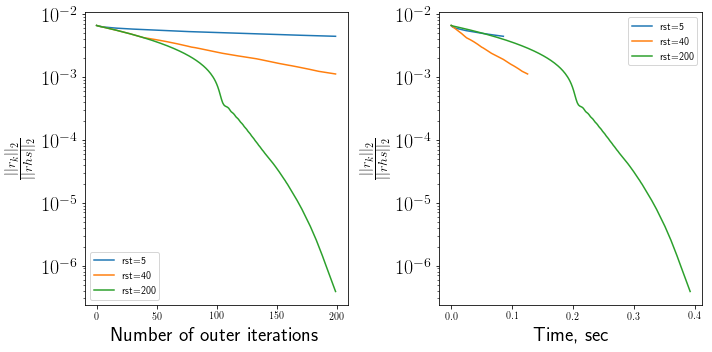

In [8]:
import scipy.sparse.linalg as la
from scipy.sparse import csc_matrix, csr_matrix
import numpy as np
import matplotlib.pyplot as plt
import time

%matplotlib inline
n = 150
ex = np.ones(n);
lp1 = sp.sparse.spdiags(np.vstack((ex,  -2*ex, ex)), [-1, 0, 1], n, n, 'csr'); 
e = sp.sparse.eye(n)
A = sp.sparse.kron(lp1, e) + sp.sparse.kron(e, lp1)
A = csr_matrix(A)
rhs = np.ones(n * n)

plt.figure(figsize=(10, 5))
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
for restart in [5, 40, 200]:
    hist = []
    def callback(rk):
        hist.append(np.linalg.norm(rk) / np.linalg.norm(rhs))
    st = time.time()
    sol = la.gmres(A, rhs, x0=np.zeros(n*n), maxiter=200, restart=restart, callback=callback, tol=1e-16)
    current_time = time.time() - st
    ax1.semilogy(np.array(hist), label='rst={}'.format(restart))
    ax2.semilogy([current_time * i / len(hist) for i in range(len(hist))], np.array(hist), label='rst={}'.format(restart))
    

ax1.legend(loc='best')
ax2.legend(loc='best')
ax1.set_xlabel("Number of outer iterations", fontsize=20)
ax2.set_xlabel("Time, sec", fontsize=20)
ax1.set_ylabel(r"$\frac{||r_k||_2}{||rhs||_2}$", fontsize=20)
ax2.set_ylabel(r"$\frac{||r_k||_2}{||rhs||_2}$", fontsize=20)
plt.sca(ax1)
plt.yticks(fontsize=20)
plt.sca(ax2)
plt.yticks(fontsize=20)
f.tight_layout()

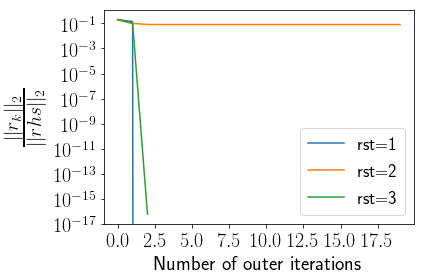

In [49]:
import scipy.sparse.linalg as la
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Example from http://www.caam.rice.edu/~embree/39961.pdf

A = np.array([[1, 1, 1],
              [0, 1, 3],
              [0, 0, 1]]
            )
rhs = np.array([2, -4, 1])
x0 = np.zeros(3)

for restart in [1, 2, 3]:
    hist = []
    def callback(rk):
        hist.append(np.linalg.norm(rk)/np.linalg.norm(rhs))
    _ = la.gmres(A, rhs, x0=x0, maxiter=20, restart=restart, callback=callback)
    plt.semilogy(np.array(hist), label='rst={}'.format(restart))
plt.legend(fontsize=18)
plt.xlabel("Number of outer iterations", fontsize=20)
plt.ylabel(r"$\frac{||r_k||_2}{||rhs||_2}$", fontsize=28)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()

## Главное

- Подпространство Крылова
- Соотношение Арнольди
- Метод сопряжённых градиентов (CG) и его сходимость
- Обобщённый метод минимальных невязок (GMRES)